In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import tensorflow as tf

from pre_processing import normalize

In [2]:
mnist = tf.keras.datasets.california_housing
(x_train, y_train),(x_test, y_test) = mnist.load_data()

features = {
    "MedInc": "median income in block group",
    "HouseAge": "median house age in block group",
    "AveRooms": "average number of rooms per household",
    "AveBedrms": "average number of bedrooms per household",
    "Population": "block group population",
    "AveOccup": "average number of household members",
    "Latitude": "block group latitude",
    "Longitude": "block group longitude"
}

normalized_X_train, x_scaler = normalize.normalize(x_train)
normalized_X_test = normalize.normalize(x_test, x_scaler)

normalized_y_train, y_scaler = normalize.normalize(y_train.reshape(-1, 1))
normalized_y_test = normalize.normalize(y_test.reshape(-1, 1), y_scaler)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0730 - root_mean_squared_error: 0.2668 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2229
Epoch 2/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0407 - root_mean_squared_error: 0.2014 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634
Epoch 3/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0265 - root_mean_squared_error: 0.1628 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 4/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0228 - root_mean_squared_error: 0.1511 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 5/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1456
Epoch 6/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0223 - root_mean_squared_error: 0.1492 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1461
Epoch 7/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 

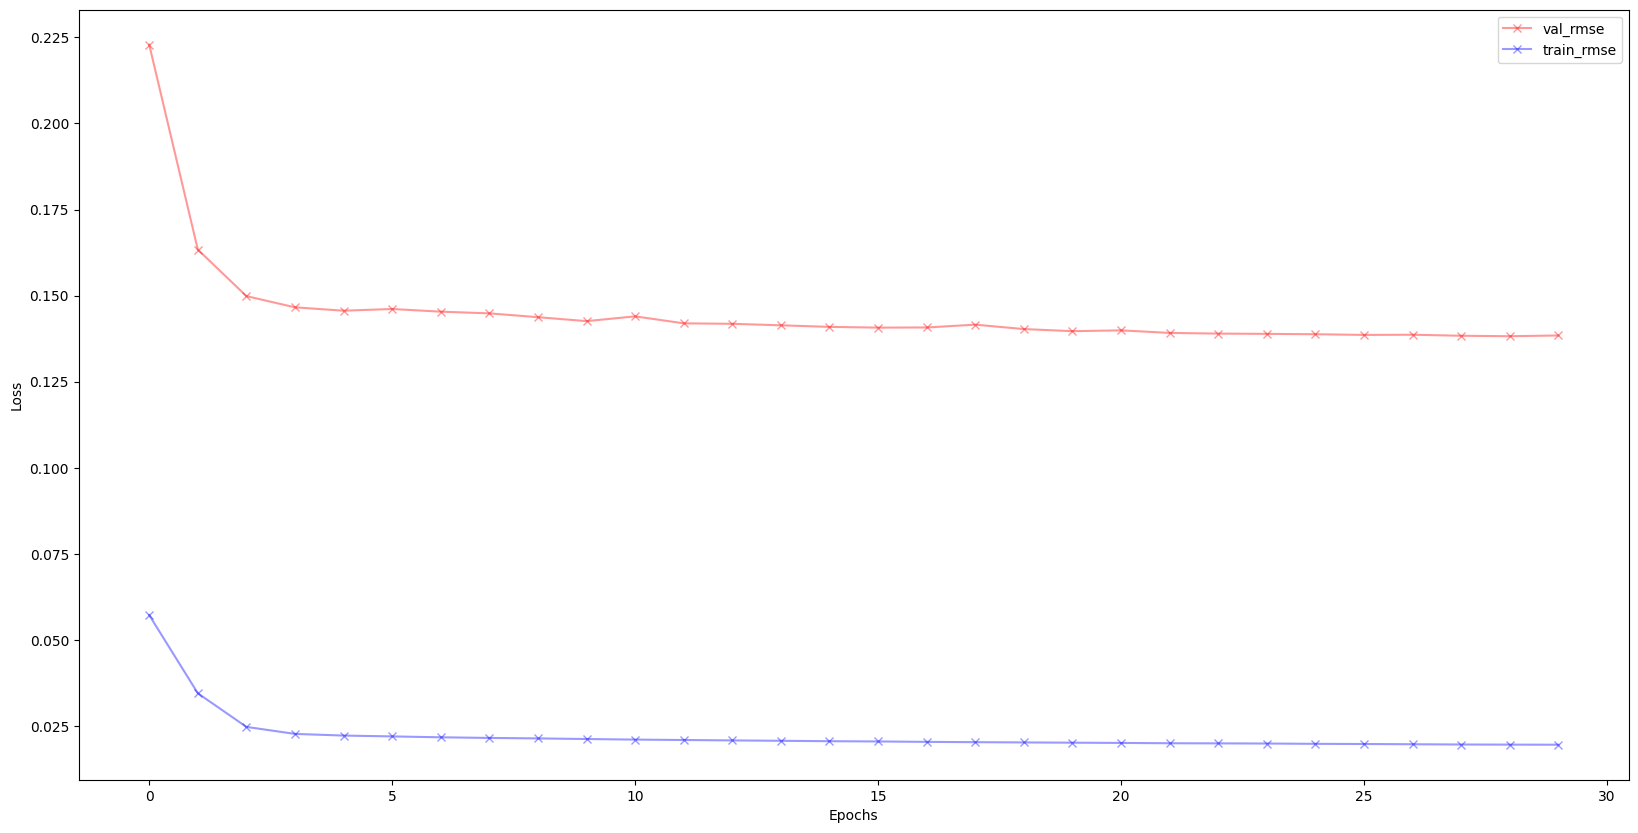

In [3]:
from models.ANN import ANN

ann_model = ANN(input_shape = normalized_X_train[0].shape, output_shape = 1)
ann_model.fit(X = normalized_X_train, y = normalized_y_train)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1718 - root_mean_squared_error: 0.3776 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1807
Epoch 2/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.0319 - root_mean_squared_error: 0.1785 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1680
Epoch 3/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 0.0275 - root_mean_squared_error: 0.1658 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 4/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0259 - root_mean_squared_error: 0.1610 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1576
Epoch 5/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 6/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 0.0250 - root_mean_squared_error: 0.1581 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 7/30
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 9

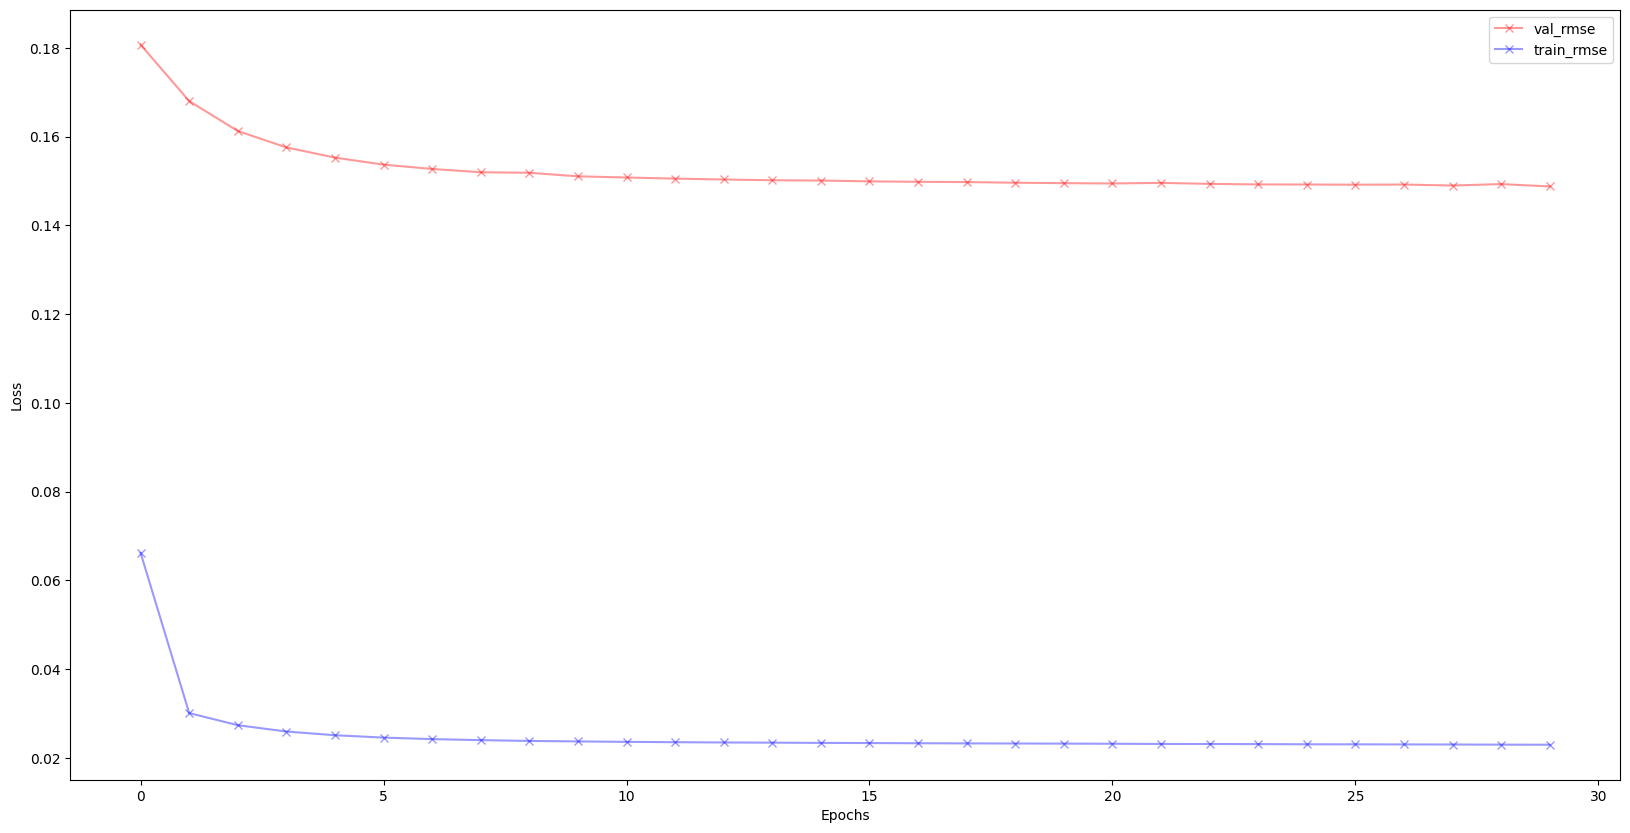

In [4]:
from models.Linear_Regression import LinearRegression

linear_regression_model = LinearRegression(input_shape = normalized_X_train[0].shape, output_shape = 1)
linear_regression_model.fit(X = normalized_X_train, y = normalized_y_train)
